In [1]:
"""
zoo.data
zoo.names

* 동물 분류 모델
0) 데이터 분석 & 시각화
1) data를 증식(동일한 데이터를 복사 및 붙여넣기, 약 100건 * 5배 => 약 500건)
2) data를 7:3의 비율로 나눔(random_state=1122)
3) xdata : 2번열(hair)~17번열까지, ydata : 18번열(type)

- 텐서플로우(케라스), https://wikidocs.net/157265 참고
- 파이토치, https://wikidocs.net/60324 참고
"""

'\nzoo.data\nzoo.names\n\n* 동물 분류 모델\n0) 데이터 분석 & 시각화\n1) data를 증식(동일한 데이터를 복사 및 붙여넣기, 약 100건 * 5배 => 약 500건)\n2) data를 7:3의 비율로 나눔(random_state=1122)\n3) xdata : 2번열(hair)~17번열까지, ydata : 18번열(type)\n\n- 텐서플로우(케라스), https://wikidocs.net/157265 참고\n- 파이토치, https://wikidocs.net/60324 참고\n'

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [147]:
data = pd.read_csv("zoo/zoo.data",header=None)

In [148]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [149]:
data.columns=['animal name','hair','feathers','eggs','milk','airborne','aquatic',
             'predator','toothed','backbone','breathes','venomous','fins','legs',
             'tail','domestic','catsize','type']

In [169]:
data["type"].value_counts()

1    205
2    100
4     65
7     50
6     40
3     25
5     20
Name: type, dtype: int64

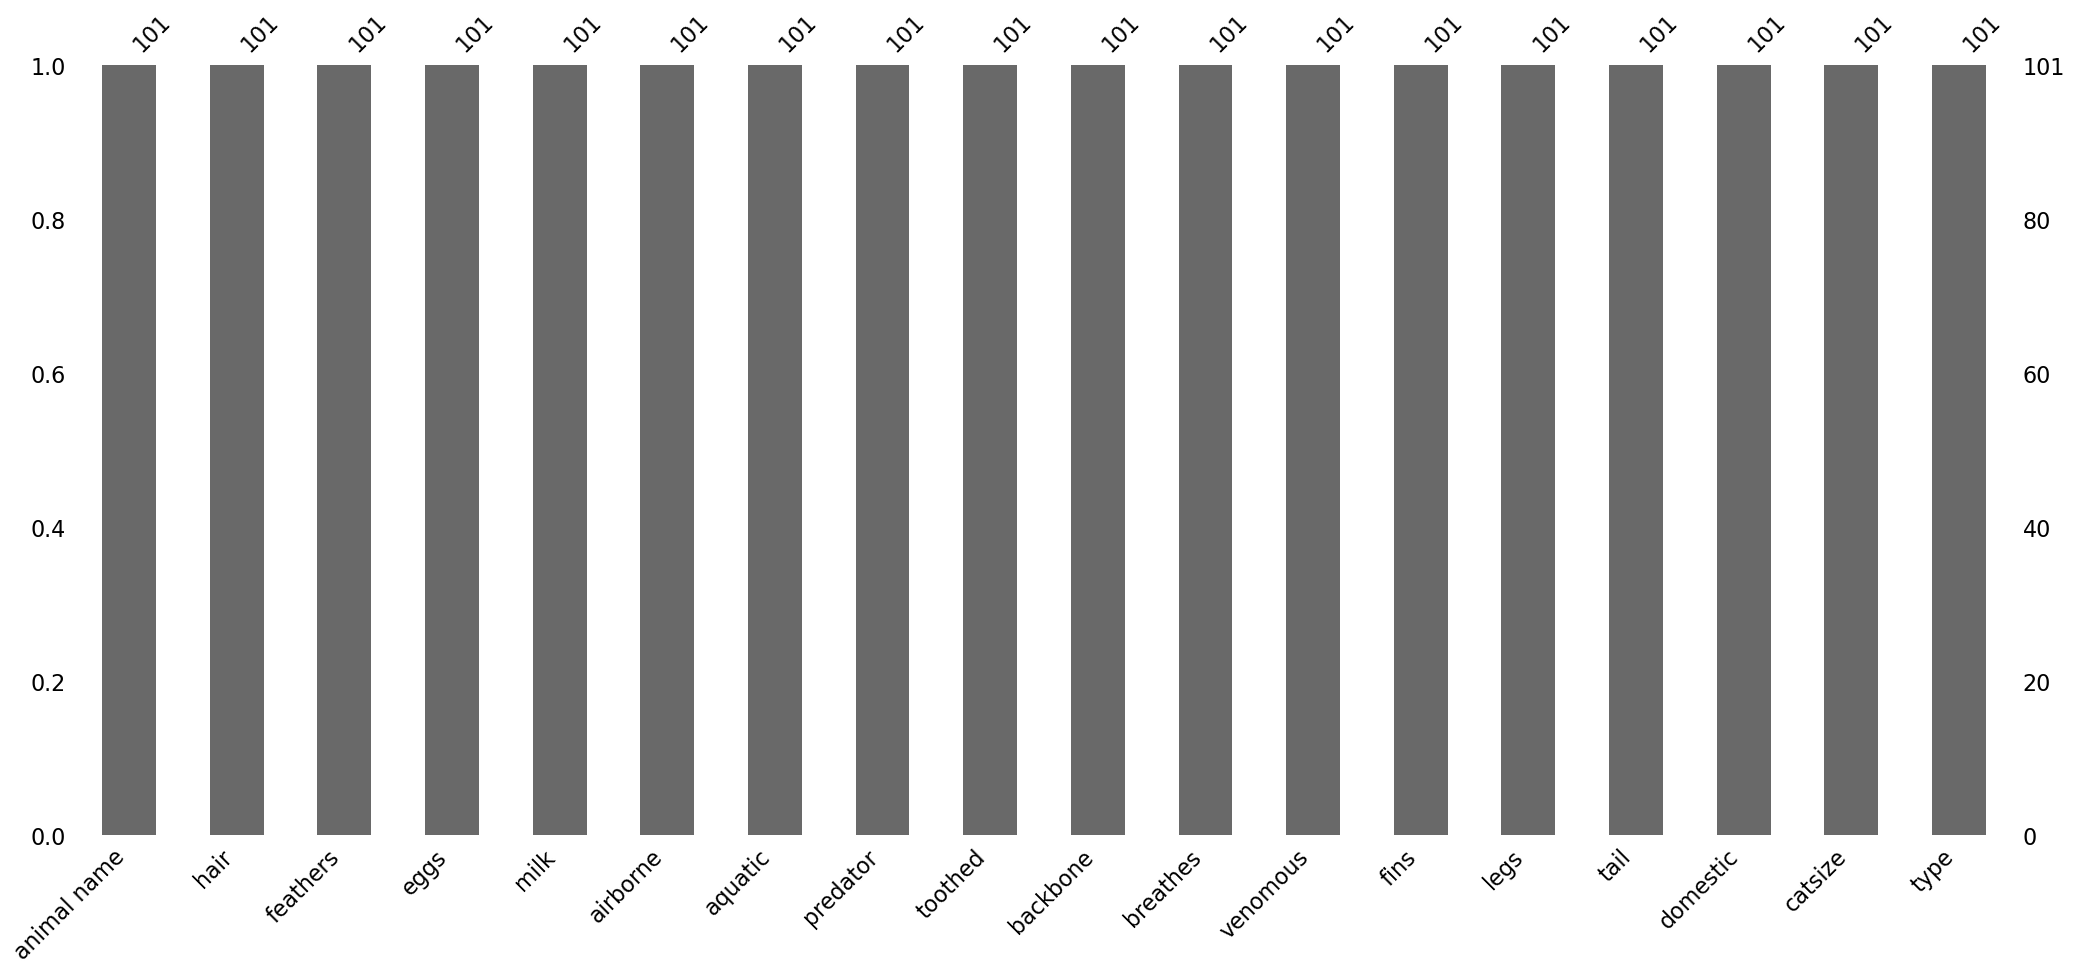

In [151]:
import missingno as msno
msno.bar(data)
plt.show()


In [152]:
# 데이터 증식 5배
data=pd.concat([data]*5)
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [138]:
len(data.columns)

18

In [153]:
# 데이터 나누기
x_data = data.loc[:,:"catsize"]
y_data = data.loc[:,"type"]

In [154]:
y_data = to_categorical(y_data) # 카테고리화
x_data = x_data.set_index("animal name")

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,
                                                   random_state=1122)

In [156]:
print("Train data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

Train data shape: (353, 16) (353, 8)
Test data shape: (152, 16) (152, 8)


In [107]:
from keras.models import Sequential
from keras.layers import Dense

In [157]:
# 모델 만들기
model = Sequential()
model.add(Dense(units=64, input_dim=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=8, activation='softmax'))

In [158]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal name,,,,,,,,,,,,,,,,
crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0
frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0
honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0
penguin,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
pony,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1


In [159]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [160]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
36/36 [==============================] - 1s 2ms/step - loss: 1.5422 - accuracy: 0.5127
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 0.9789 - accuracy: 0.7762
Epoch 3/100
36/36 [==============================] - 0s 1ms/step - loss: 0.6022 - accuracy: 0.8640
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8952
Epoch 5/100
36/36 [==============================] - 0s 1ms/step - loss: 0.2772 - accuracy: 0.9292
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9660
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.1339 - accuracy: 0.9802
Epoch 8/100
36/36 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9858
Epoch 9/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9943
Epoch 10/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0560 - accuracy: 0.9972
Epoch 11/

36/36 [==============================] - 0s 1ms/step - loss: 2.1099e-04 - accuracy: 1.0000
Epoch 82/100
36/36 [==============================] - 0s 1ms/step - loss: 2.0270e-04 - accuracy: 1.0000
Epoch 83/100
36/36 [==============================] - 0s 1ms/step - loss: 1.9516e-04 - accuracy: 1.0000
Epoch 84/100
36/36 [==============================] - 0s 1ms/step - loss: 1.9121e-04 - accuracy: 1.0000
Epoch 85/100
36/36 [==============================] - 0s 1ms/step - loss: 1.8316e-04 - accuracy: 1.0000
Epoch 86/100
36/36 [==============================] - 0s 896us/step - loss: 1.7747e-04 - accuracy: 1.0000
Epoch 87/100
36/36 [==============================] - 0s 1ms/step - loss: 1.7319e-04 - accuracy: 1.0000
Epoch 88/100
36/36 [==============================] - 0s 978us/step - loss: 1.6498e-04 - accuracy: 1.0000
Epoch 89/100
36/36 [==============================] - 0s 992us/step - loss: 1.5989e-04 - accuracy: 1.0000
Epoch 90/100
36/36 [==============================] - 0s 1ms/step - los

In [166]:
loss, accuracy = model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 1.4080e-04 - accuracy: 1.0000


1.0